<a href="https://colab.research.google.com/github/pikey-msc/RiesgosFinancieros/blob/master/2020-2/Insumos/pca_emp_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython
!rm -rf RiesgosFinancieros
!git clone "https://github.com/pikey-msc/RiesgosFinancieros/"



/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Cloning into 'RiesgosFinancieros'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 502 (delta 143), reused 0 (delta 0), pack-reused 311
Receiving objects: 100% (502/502), 16.94 MiB | 8.75 MiB/s, done.
Resolving deltas: 100% (326/326), done.


In [0]:
%%R
library(MASS) 

In [9]:
%%R

incump="RiesgosFinancieros/2020-2/Insumos/base_inc.csv"

data=read.csv(incump, sep=",", quote="/")

n<-nrow(data)-1
m=ncol(data)
x<-as.matrix(data.frame(data[2:n,3:m])/1)

G<-eigen((n)*cov(x)/(n-1))      #eigenvectores

g1<-G$values                  #eigenvalores

g1p<-g1/sum(g1) #porcentaje de varianza

g1pac<-g1/sum(g1) #porcentaje de varianza



for (i in (1:nrow(as.matrix(g1))))
{
g1pac[i]=sum(g1p[1:i])
}
print(g1pac)

g1pac=cumsum(g1p)
print(g1pac)

 [1] 0.5849264 0.7908101 0.8788158 0.9214424 0.9505772 0.9745325 0.9839964
 [8] 0.9926034 0.9970781 0.9995081 0.9998415 1.0000000
 [1] 0.5849264 0.7908101 0.8788158 0.9214424 0.9505772 0.9745325 0.9839964
 [8] 0.9926034 0.9970781 0.9995081 0.9998415 1.0000000


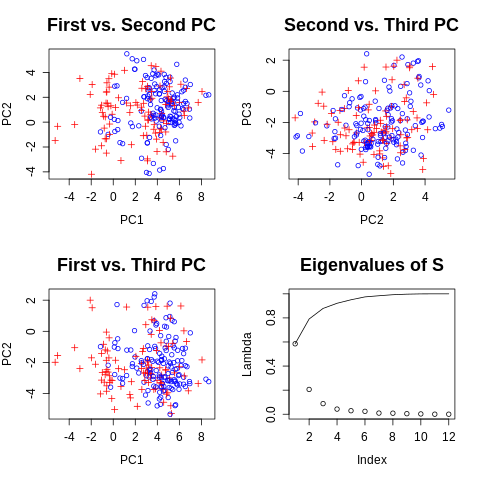

In [8]:
%%R
y<-as.matrix(x-colMeans(x))%*%G$vector

par(mfrow=c(2,2))
#grafica primero versus segundo
plot(y[,1],y[,2],pch=c(rep(1,100),rep(3,100)),col=c(rep("blue",100),rep("red",100)),xlab="PC1",ylab="PC2",main="First vs. Second PC",cex.lab=1.2,cex.axis=1.2,cex.main=1.8)

#grafica segundo versus tercero
plot(y[,2],y[,3],pch=c(rep(1,100),rep(3,100)),col=c(rep("blue",100),rep("red",100)),xlab="PC2",ylab="PC3",main="Second vs. Third PC",cex.lab=1.2,cex.axis=1.2,cex.main=1.8)

#grafica primero y tercero
plot(y[,1],y[,3],pch=c(rep(1,100),rep(3,100)),col=c(rep("blue",100),rep("red",100)),xlab="PC1",ylab="PC2",main="First vs. Third PC",cex.lab=1.2,cex.axis=1.2,cex.main=1.8)

#gráfica de los eigenvalores
plot(g1p,ylim=c(0,1),xlab="Index",ylab="Lambda",main="Eigenvalues of S",cex.lab=1.2,cex.axis=1.2,cex.main=1.8)
lines(g1pac)



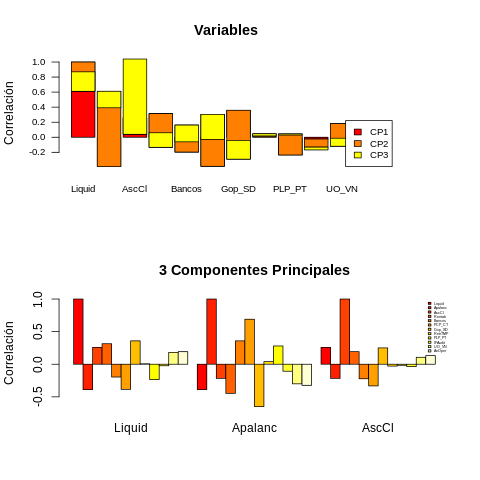

In [16]:
%%R
ycorx=cor(cbind(x,y))[1:(m-2),1:12]
min(ycorx)
max(ycorx)

#Gráfica de Correlación
par(mfrow=c(2,1))
library(MASS) 
par(xpd=T, mar=par()$mar+c(0,0,0,4))
barplot(t(ycorx[,1:3]), main="Variables", ylab="Correlación", col=heat.colors(3), space=0.1, cex.axis=0.8, las=1,cex=0.8)
legend("bottomright", c("CP1", "CP2", "CP3"), cex=0.8, fill=heat.colors(3))  
par(mar=c(5, 4, 4, 2) + 0.1)



barplot(ycorx[,1:3], main="3 Componentes Principales", ylab= "Correlación",
   beside=TRUE, col=heat.colors(12))

# Place the legend at the top-left corner with no frame  
# using rainbow colors
legend("topright", row.names(ycorx), cex=0.3, 
   bty="n", fill=heat.colors(12));
